In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')

In [3]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [4]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
DF['World without China'] = DF.World - DF.China
#DF.index.rename('Date', inplace = True)

In [5]:
# Countries = ['India', 'World', 'World without China',
#                       'US', 'Italy', 'Spain', 'China', 'Argentina',
#                       'UK', 'France', 'Brazil',
#                       'S.Korea', 'Iran', 'Belgium', 'New Zealand', 
#                        'Russia', 'Mexico']#[::-1]
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'World without China': 'Green', 
          'US': 'Black', 'China': 'red', 
          'Spain': 'yellow',
          'Italy': 'grey', 
          'Iran': 'brown', 
          'UK': 'Purple', 
          'S.Korea': 'Black', 
          'France': 'violet', 
#           'Germany': 'lime', 
          'Argentina': 'Teal',
          'Russia': 'cyan', 
          'Mexico': 'Orange', 
          'Brazil': 'darkgreen', 
#           'Belgium': 'cyan',
          'New Zealand': 'lightblue'}

Countries = list(colors.keys())

In [6]:
def plotter(DF, name, scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [7]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [8]:
def stackplotter(DF, name, tail=30):
    plt.figure(figsize = (14, 7))
    
    DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [9]:
Deaths = DF.copy()

In [10]:
Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-10,127571,1273012,1268270,240589,4742,39345,42330,39202,49861,487,41062,34183,30899,95842,162802,25
2020-11-11,128121,1284636,1279894,241977,4742,40105,42953,39664,50457,487,42599,34531,31326,96430,163368,25
2020-11-12,128668,1293954,1289212,243194,4742,40461,43589,40121,51020,488,42599,34782,31755,97056,164281,25
2020-11-13,129188,1302556,1297814,244332,4742,40769,44139,40582,51396,492,42600,35045,32156,97624,164737,25
2020-11-14,129635,1311192,1306450,245598,4742,40769,44683,41034,51858,493,42600,35307,32536,98259,165658,25


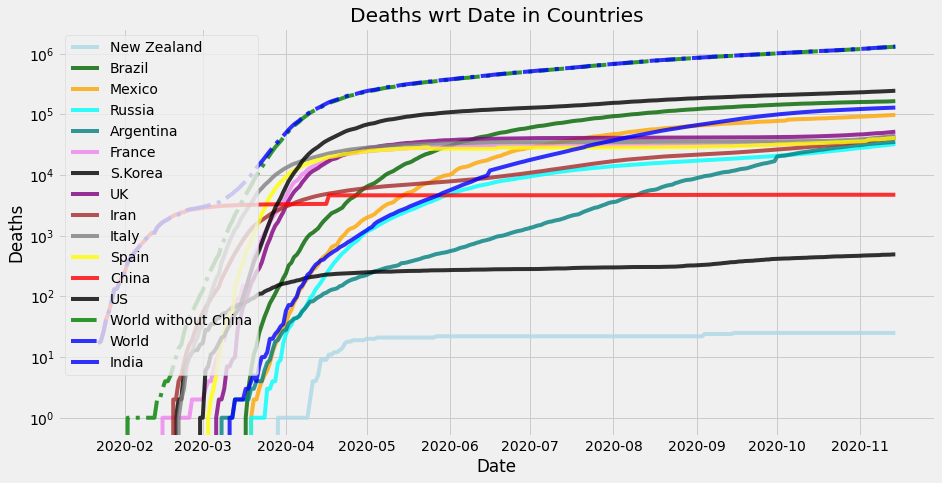

In [11]:
plotter(Deaths, 'Deaths')

In [12]:
Biweekly_Deaths = np.round((Deaths - Deaths.shift(14))/14, 2)
Biweekly_Deaths = Biweekly_Deaths.fillna(0)#.astype('int')
Biweekly_Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-10,540.07,7538.07,7537.86,953.36,0.21,289.07,330.71,421.64,314.71,1.86,391.43,318.07,320.71,430.57,346.86,0.0
2020-11-11,542.43,7862.50,7862.29,980.93,0.21,331.36,360.57,425.00,335.14,1.79,484.00,318.57,326.71,437.21,350.86,0.0
2020-11-12,541.29,8023.86,8023.64,998.36,0.21,344.43,390.50,429.14,355.36,1.79,467.21,310.00,331.71,448.79,379.43,0.0
2020-11-13,539.07,8099.50,8099.29,1006.93,0.21,349.36,415.57,436.00,362.64,2.00,428.21,303.79,335.29,452.50,375.71,0.0
2020-11-14,537.43,8248.86,8248.64,1033.79,0.21,349.36,433.21,440.71,372.36,1.93,412.43,307.50,339.21,464.71,412.43,0.0


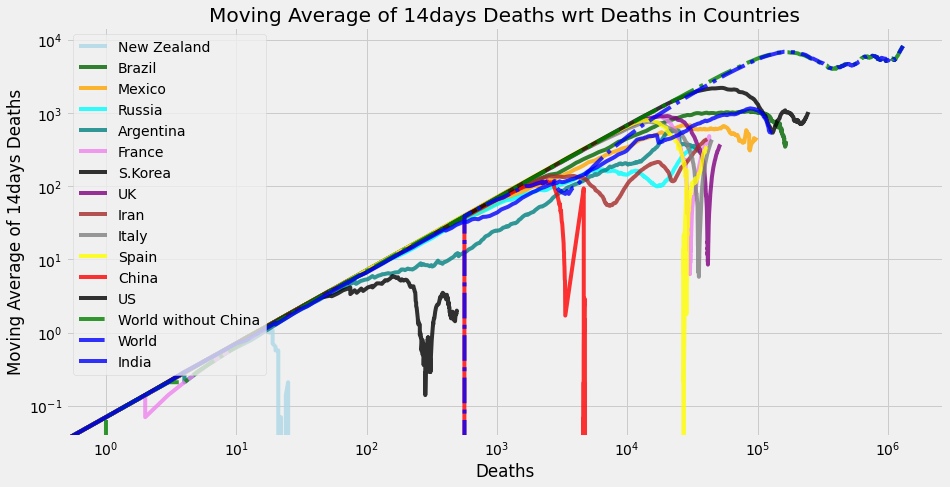

In [13]:
plotwrtDeaths(Biweekly_Deaths, 'Moving Average of 14days Deaths', Deaths)

In [14]:
Weekly_Deaths = np.round((Deaths - Deaths.shift(7))/7)
Weekly_Deaths = Weekly_Deaths.fillna(0).astype('int')
Weekly_Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-10,566,8259,8259,993,0,407,417,435,360,2,450,304,327,464,329,0
2020-11-11,544,8348,8348,1038,0,284,456,441,375,2,553,287,333,457,323,0
2020-11-12,526,8527,8527,1045,0,282,485,448,401,2,502,288,353,469,454,0
2020-11-13,518,8394,8394,1047,0,277,500,453,404,2,383,273,357,472,389,0
2020-11-14,502,8549,8549,1083,0,277,517,457,411,2,340,280,361,493,484,0


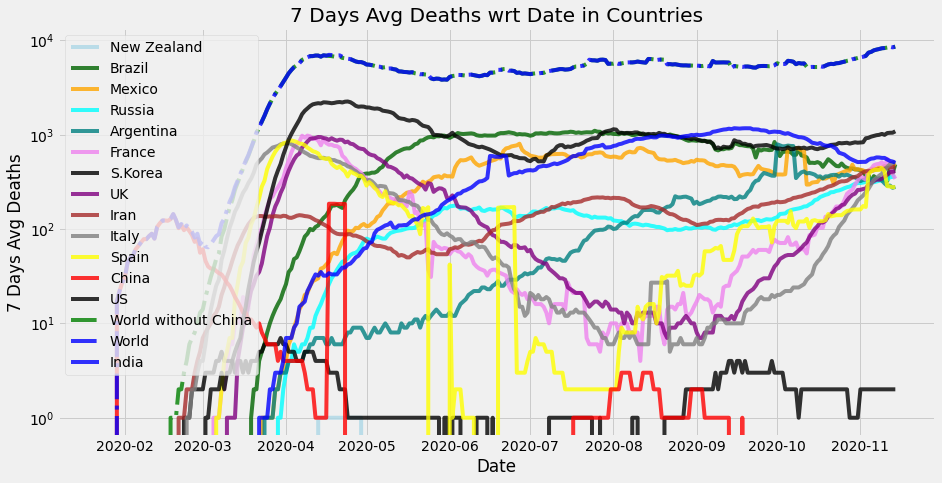

In [15]:
plotter(Weekly_Deaths, '7 Days Avg Deaths')

In [16]:
ThreeDaysDeaths = np.round((Deaths - Deaths.shift(3))/3)
ThreeDaysDeaths = ThreeDaysDeaths.fillna(0).astype('int')
ThreeDaysDeaths[Countries].tail(5)

Country/Region,India,World,World without China,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-10,483,7220,7220,857,0,171,422,457,294,3,281,278,296,345,178,0
2020-11-11,503,9179,9178,1162,0,424,520,458,441,2,703,324,345,468,324,0
2020-11-12,536,9910,9909,1335,0,372,613,457,564,1,517,292,403,610,551,0
2020-11-13,539,9848,9848,1248,0,475,603,460,512,2,513,287,419,594,645,0
2020-11-14,505,8852,8852,1207,0,221,577,457,467,2,0,259,403,610,763,0


In [17]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-10,512,8787,8786,1400,1,0,580,453,532,2,13,276,353,617,174,0
2020-11-11,550,11624,11624,1388,0,760,623,462,596,0,1537,348,427,588,566,0
2020-11-12,547,9318,9318,1217,0,356,636,457,563,1,0,251,429,626,913,0
2020-11-13,520,8602,8602,1138,0,308,550,461,376,4,1,263,401,568,456,0
2020-11-14,447,8636,8636,1266,0,0,544,452,462,1,0,262,380,635,921,0


In [18]:
Reproductivity = np.round(Weekly_Deaths/Biweekly_Deaths.shift(8), 4)#.iloc[-1]
Reproductivity[Countries].iloc[-1]

Country/Region
India                  0.9240
World                  1.2063
World without China    1.2063
US                     1.2069
China                  0.0000
Spain                  0.9503
Italy                  2.0224
Iran                   1.1796
UK                     1.4739
S.Korea                1.3986
France                 0.8847
Argentina              0.8170
Russia                 1.1751
Mexico                 1.1482
Brazil                 1.2222
New Zealand               NaN
Name: 2020-11-14 00:00:00, dtype: float64

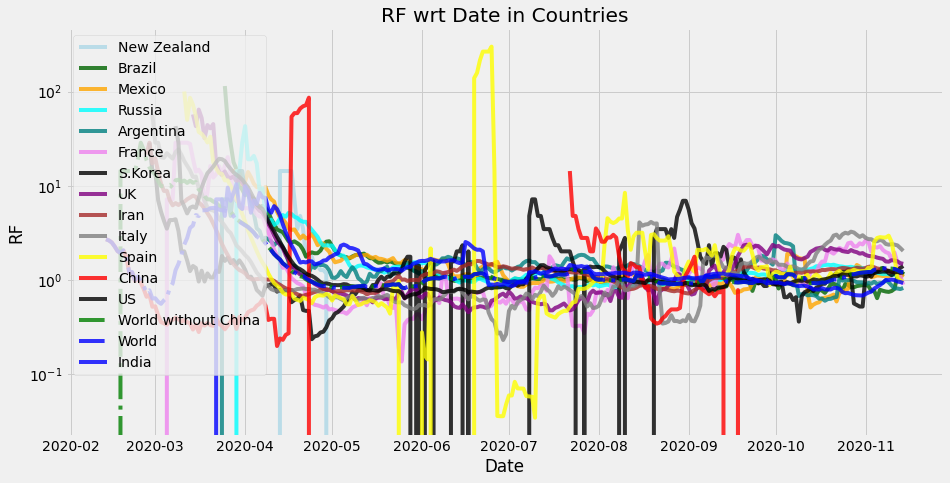

In [19]:
plotter(Reproductivity, 'RF')
pd.melt(Reproductivity).to_csv('CSVs/Reproductivity.csv')

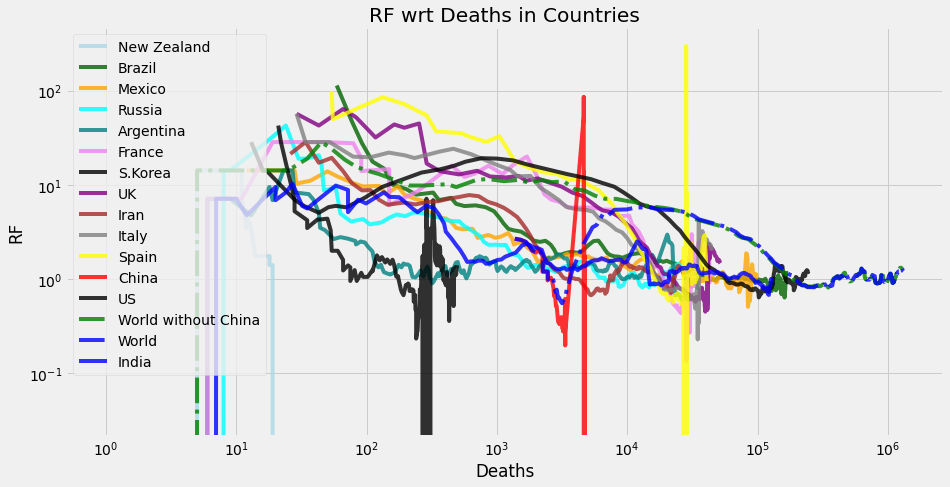

In [20]:
plotwrtDeaths(Reproductivity, 'RF', Deaths)

In [21]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [22]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Weekly Deaths': Weekly_Deaths,
    'Triday Deaths': ThreeDaysDeaths,
    'Daily Deaths':Daily_Deaths,
    'Reproductive Factor':Reproductivity,
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
# LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=4000]

In [23]:
Growth = np.round(Weekly_Deaths/Deaths, 4)
#Growth = Growth.fillna(0)
Growth[Countries].tail(5)

Country/Region,India,World,World without China,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-10,0.0044,0.0065,0.0065,0.0041,0.0,0.0103,0.0099,0.0111,0.0072,0.0041,0.0110,0.0089,0.0106,0.0048,0.0020,0.0
2020-11-11,0.0042,0.0065,0.0065,0.0043,0.0,0.0071,0.0106,0.0111,0.0074,0.0041,0.0130,0.0083,0.0106,0.0047,0.0020,0.0
2020-11-12,0.0041,0.0066,0.0066,0.0043,0.0,0.0070,0.0111,0.0112,0.0079,0.0041,0.0118,0.0083,0.0111,0.0048,0.0028,0.0
2020-11-13,0.0040,0.0064,0.0065,0.0043,0.0,0.0068,0.0113,0.0112,0.0079,0.0041,0.0090,0.0078,0.0111,0.0048,0.0024,0.0
2020-11-14,0.0039,0.0065,0.0065,0.0044,0.0,0.0068,0.0116,0.0111,0.0079,0.0041,0.0080,0.0079,0.0111,0.0050,0.0029,0.0


In [24]:
def days100(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]

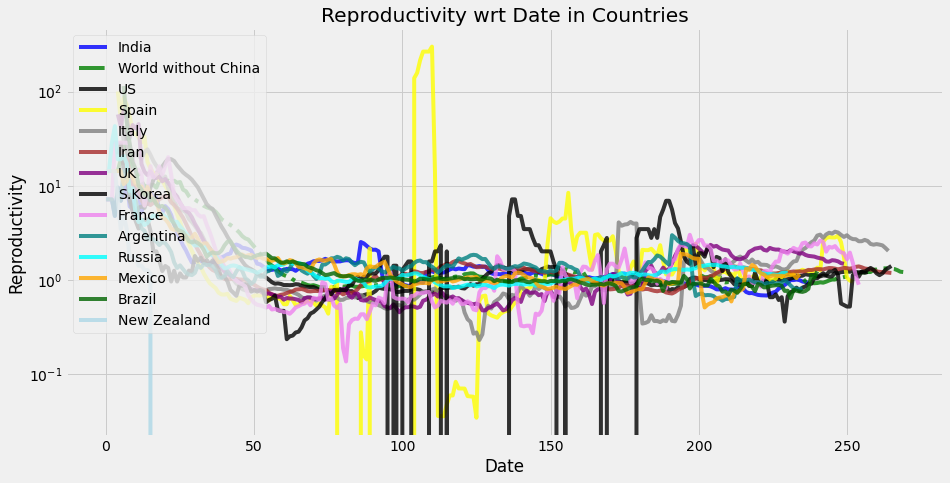

In [25]:
RF = days100(Reproductivity)#.tail(100)
plotter(RF[[cun for cun in Countries if cun not in ['China', 'World']]], 'Reproductivity', col = 'all')

In [26]:
LastDay_DF.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Vanuatu', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'World',
       'World without China'],
      dtype='object', name='Country', length=193)

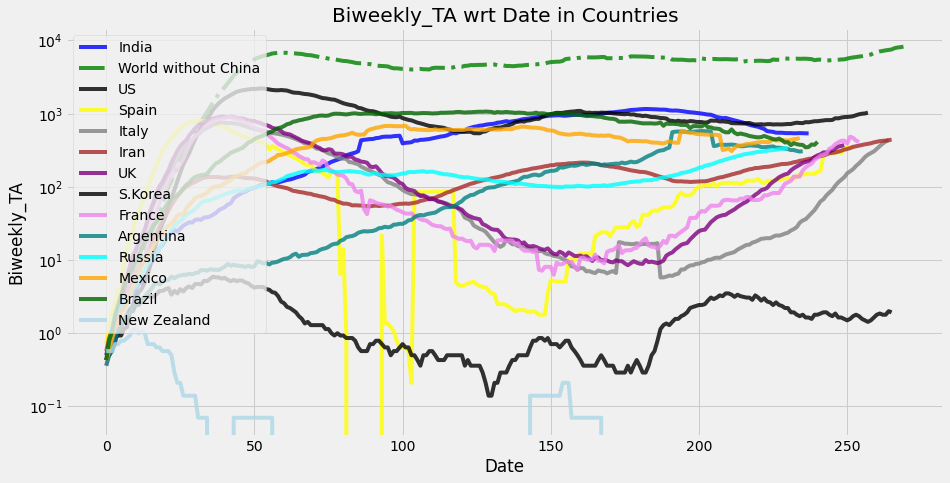

In [27]:
BD = days100(Biweekly_Deaths)
plotter(BD[[cun for cun in Countries if cun not in ['China', 'World']]], 'Biweekly_TA', col = 'all')

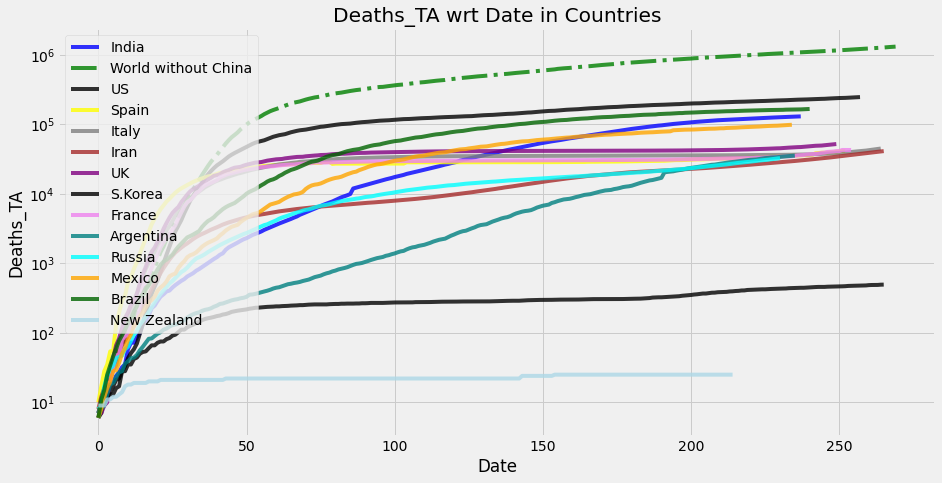

In [28]:
D = days100(Deaths)
plotter(D[[cun for cun in Countries if cun not in ['China', 'World']]], 'Deaths_TA', col = 'all')

In [29]:
def TA(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [0 for _ in range(len(X[col]) - len(L))]
    return X

In [30]:
def csvify(X, name):
    DF = X.copy()
    DF['Date'] = DF.index
    DF = pd.melt(DF, id_vars = 'Date')
    DF.to_csv(f'CSVs\\{name}.csv', index = False)

In [31]:
for name, df in {'Deaths': Deaths, 
           'BiweeklyDeaths': Biweekly_Deaths,
           'Daily_Deaths': Daily_Deaths,
           'Reproductivity': Reproductivity,
          }.items():
    csvify(df, name)
    csvify(TA(df), 'TA_' + name)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(10)

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
World,1311192,8248.86,8549,8852,8636,1.2063
World without China,1306450,8248.64,8549,8852,8636,1.2063
US,245598,1033.79,1083,1207,1266,1.2069
Brazil,165658,412.43,484,763,921,1.2222
India,129635,537.43,502,505,447,0.9240
Mexico,98259,464.71,493,610,635,1.1482
UK,51858,372.36,411,467,462,1.4739
Italy,44683,433.21,517,577,544,2.0224
France,42600,412.43,340,0,0,0.8847


In [33]:
LastDay_DF.sort_values('Weekly Deaths', ascending = False).head(10)

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
World without China,1306450,8248.64,8549,8852,8636,1.2063
World,1311192,8248.86,8549,8852,8636,1.2063
US,245598,1033.79,1083,1207,1266,1.2069
Italy,44683,433.21,517,577,544,2.0224
India,129635,537.43,502,505,447,0.9240
Mexico,98259,464.71,493,610,635,1.1482
Brazil,165658,412.43,484,763,921,1.2222
Iran,41034,440.71,457,457,452,1.1796
UK,51858,372.36,411,467,462,1.4739


In [34]:
LastDay_DF[(LastDay_DF['Reproductive Factor']>.8) & (LastDay_DF['Weekly Deaths']>100)]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Argentina,35307,307.50,280,259,262,0.8170
Belgium,14303,191.29,199,182,197,1.3590
Brazil,165658,412.43,484,763,921,1.2222
Colombia,33829,179.64,176,172,160,0.9466
Czechia,6058,200.50,197,163,132,1.0975
France,42600,412.43,340,0,0,0.8847
Germany,12511,144.86,172,172,107,1.9081
India,129635,537.43,502,505,447,0.9240
Iran,41034,440.71,457,457,452,1.1796


In [35]:
LastDay_DF[(LastDay_DF['Weekly Deaths'] == 0) & (LastDay_DF.Deaths > 144)]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Australia,907,0.00,0,0,0,0.0
Bahamas,155,0.79,0,0,0,0.0
China,4742,0.21,0,0,0,0.0
Congo (Kinshasa),319,0.86,0,1,1,0.0
Ghana,320,0.00,0,0,0,0.0
Haiti,232,0.00,0,0,0,0.0
Malawi,185,0.07,0,0,0,0.0
Mauritania,165,0.14,0,0,0,0.0
Nicaragua,158,0.14,0,0,0,0.0


In [36]:
dt.datetime.now()

datetime.datetime(2020, 11, 16, 2, 25, 57, 453151)

In [37]:
LastDay_DF[LastDay_DF['Weekly Deaths']> 200]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Argentina,35307,307.50,280,259,262,0.8170
Brazil,165658,412.43,484,763,921,1.2222
France,42600,412.43,340,0,0,0.8847
India,129635,537.43,502,505,447,0.9240
Iran,41034,440.71,457,457,452,1.1796
Italy,44683,433.21,517,577,544,2.0224
Mexico,98259,464.71,493,610,635,1.1482
Poland,10045,315.29,344,413,546,1.5461
Russia,32536,339.21,361,403,380,1.1751


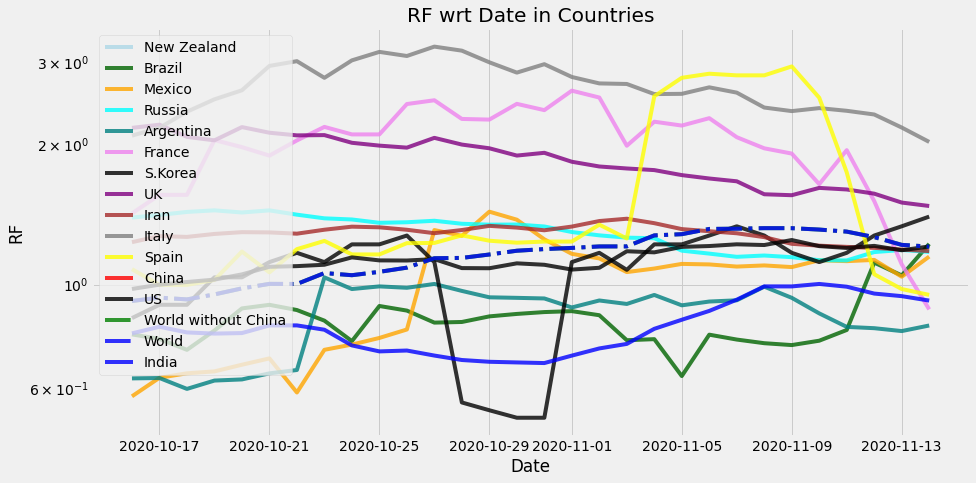

In [38]:
plotter(Reproductivity.tail(30), 'RF')

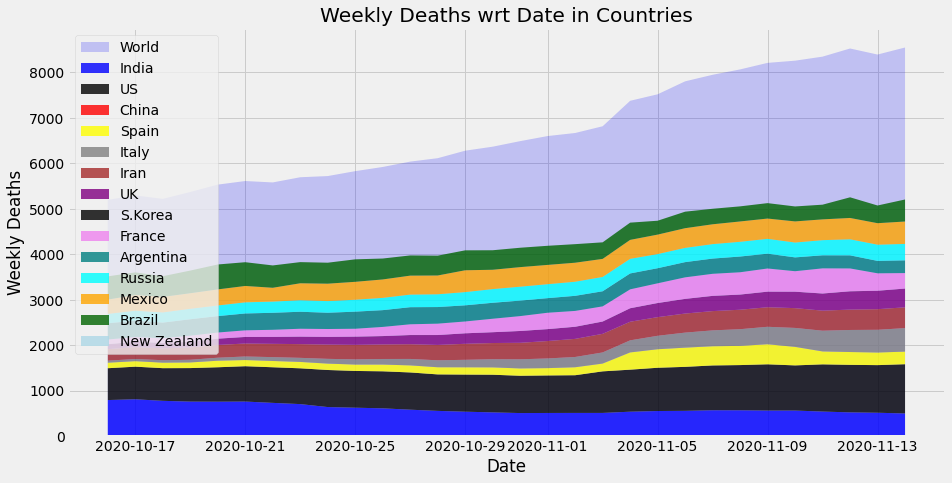

In [39]:
stackplotter(Weekly_Deaths, 'Weekly Deaths')

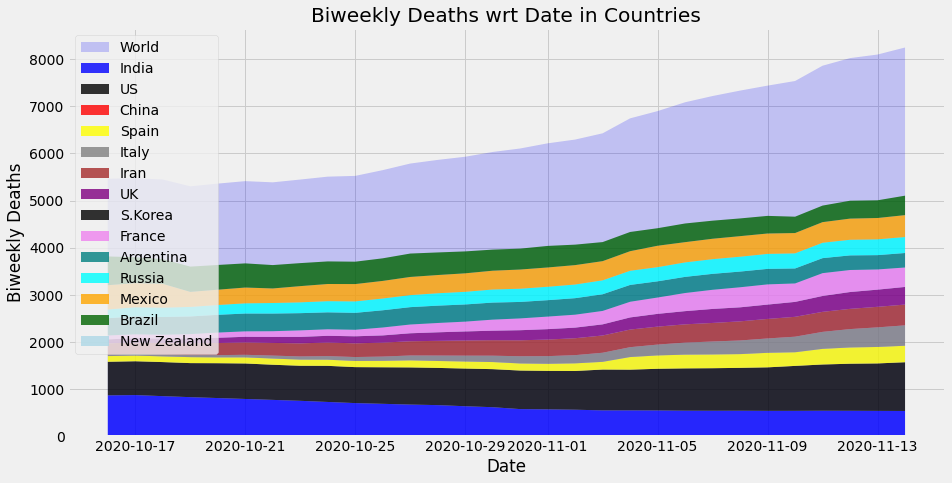

In [40]:
stackplotter(Biweekly_Deaths, 'Biweekly Deaths')

In [41]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[2:]
    deaths = DF[name][2:]
    
    print ('World: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World:  1311192


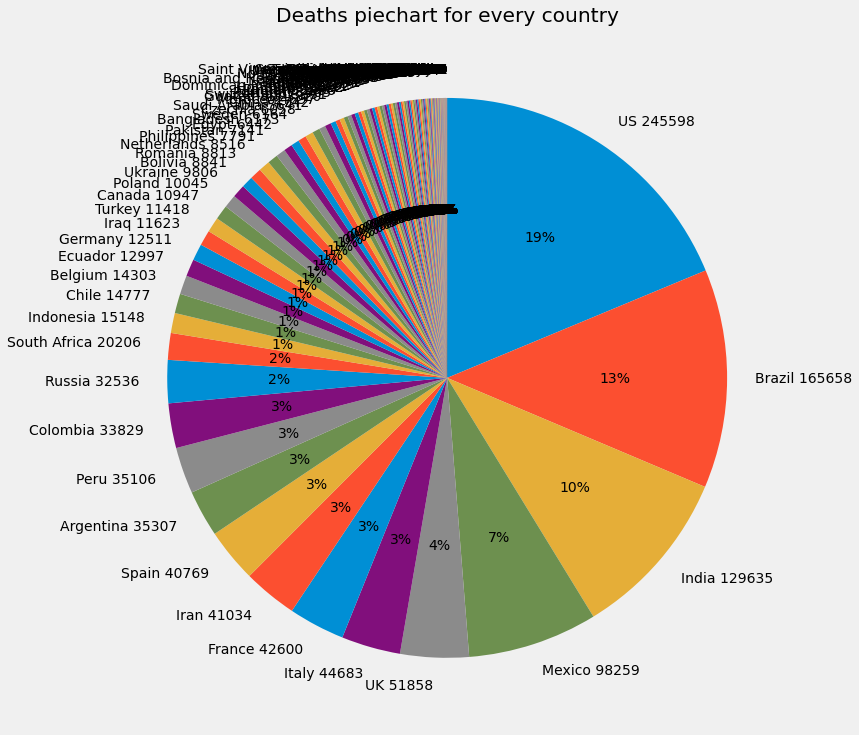

In [42]:
piechart()

World:  8549


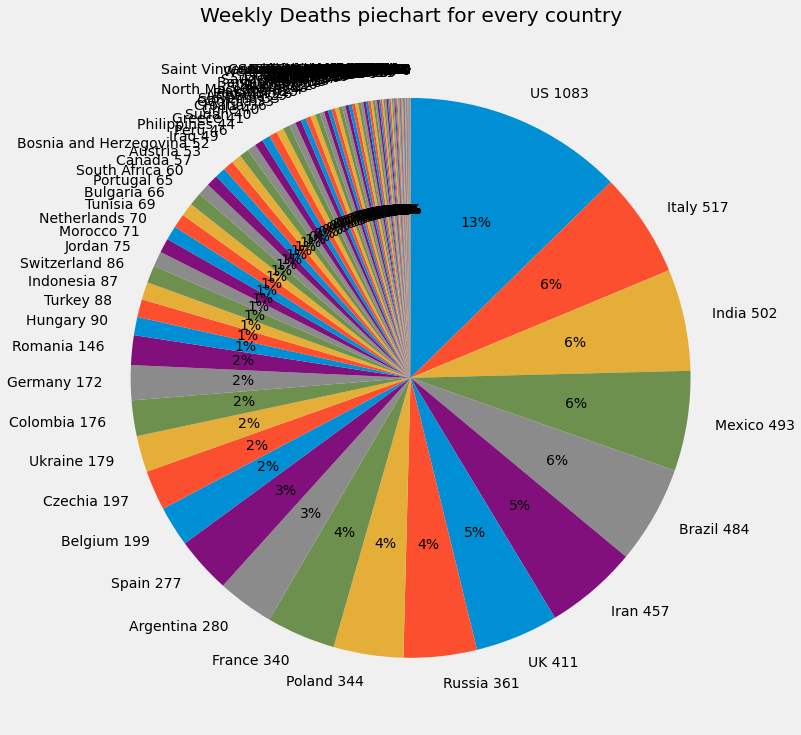

In [43]:
piechart('Weekly Deaths')

World:  8636


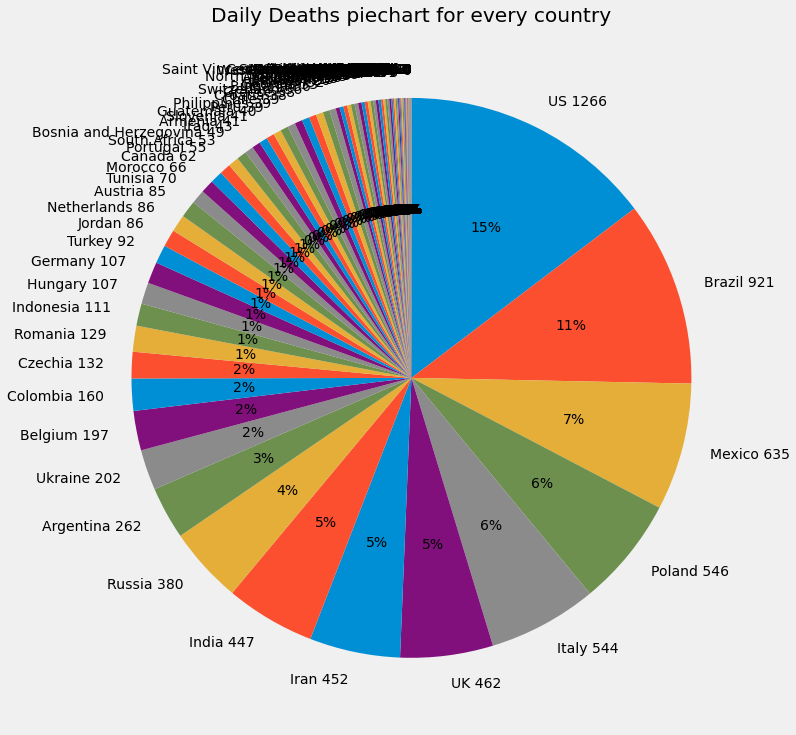

In [44]:
piechart('Daily Deaths')